In [2]:
# Standard library imports
import os
import sys
import importlib
import numpy as np
import random
import cv2
from tqdm import tqdm

# Add project-specific paths
sys.path.append(os.path.join(os.getcwd(), 'common'))

# Import custom modules
import embedding
import detection
import grt
import attacks
import test_utility
import utility
# Reload module for updates
importlib.reload(grt)

importlib.reload(detection)
importlib.reload(attacks)
importlib.reload(embedding)
importlib.reload(test_utility)
importlib.reload(utility    )

<module 'utility' from '/home/sh4ring4n/University/mds/multimedia-data-security/common/utility.py'>

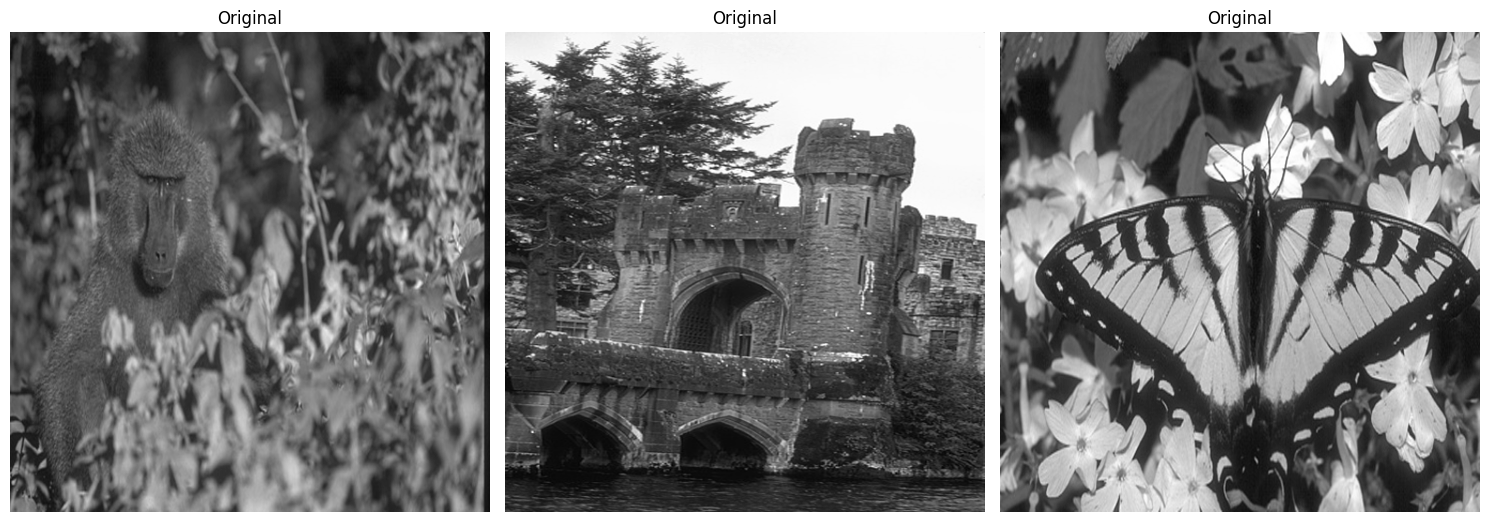

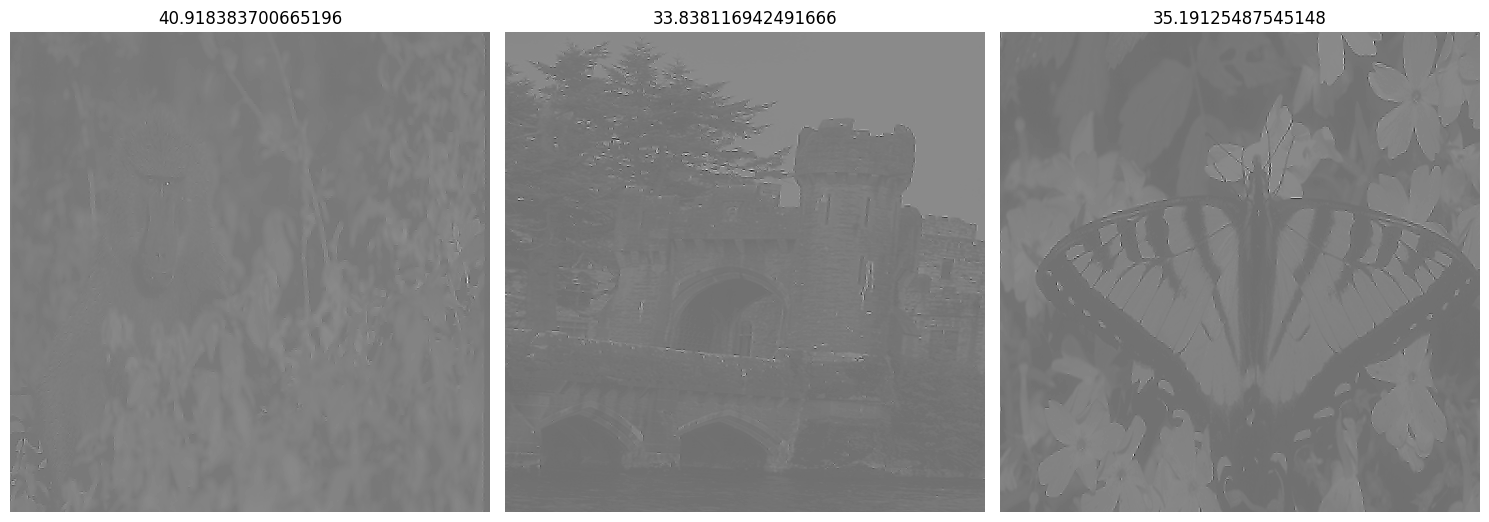

mean psnr after embedding  36.64925183953611


In [17]:
alpha =30
max_layer=0 
wm,imgs,inv = test_utility.watermarked_images(alpha=alpha,max_layer=max_layer,num_images=3,embedding_mask=2)
for img in imgs:
    cv2.imwrite('./watermarked_imgs/', img)


In [40]:
attecked,_,_ = grt.blur_gauss(wm[2], 10)
det,q = detection.detection(imgs[2], wm[2],attecked, alpha, max_layer)
print(det,q)


0.0 21.04811293309986
0 21.04811293309986


In [16]:
attecked,_,_ = grt.blur_gauss(wm[0], 1.1)
det,q = detection.detection(imgs[0], wm[0],attecked, alpha, max_layer)
print(det,q)


0 35.3076157464307


In [13]:
# at,_,_ = grt.jpeg_compression(imgs[2], 90)
at,_,_ = attacks.jpeg_compression(wm[2], 8)
# utility.visualize_images_with_desc([imgs[2],at],['Original','Jpeg compressed'])
det,q = detection.detection(imgs[2], wm[2],at, alpha, max_layer)
print(det,q)


1 35.666253197409


In [37]:
attecked,_,_ = grt.jpeg_compression(wm[1], 60)
det,q = detection.detection(imgs[1], wm[1],attecked, alpha, max_layer)
print(det,q)


0.9666296343040506 35.558547654623695
1 35.558547654623695


In [8]:
imgs = [cv2.imread(os.path.join('./challenge_imgs', img), 0) for img in os.listdir('./challenge_imgs')]
labels = ['buildings', 'rollercoaster', 'tree']
mark = np.load('ammhackati.npy')
watermarked = [embedding.embedding(img, mark, alpha=8.4, max_layer=2, mask_type=2) for img in imgs]
for w, l in zip(watermarked, labels):
    cv2.imwrite(f'./watermarked_imgs/ammhackati_{l}.bmp', w)
    



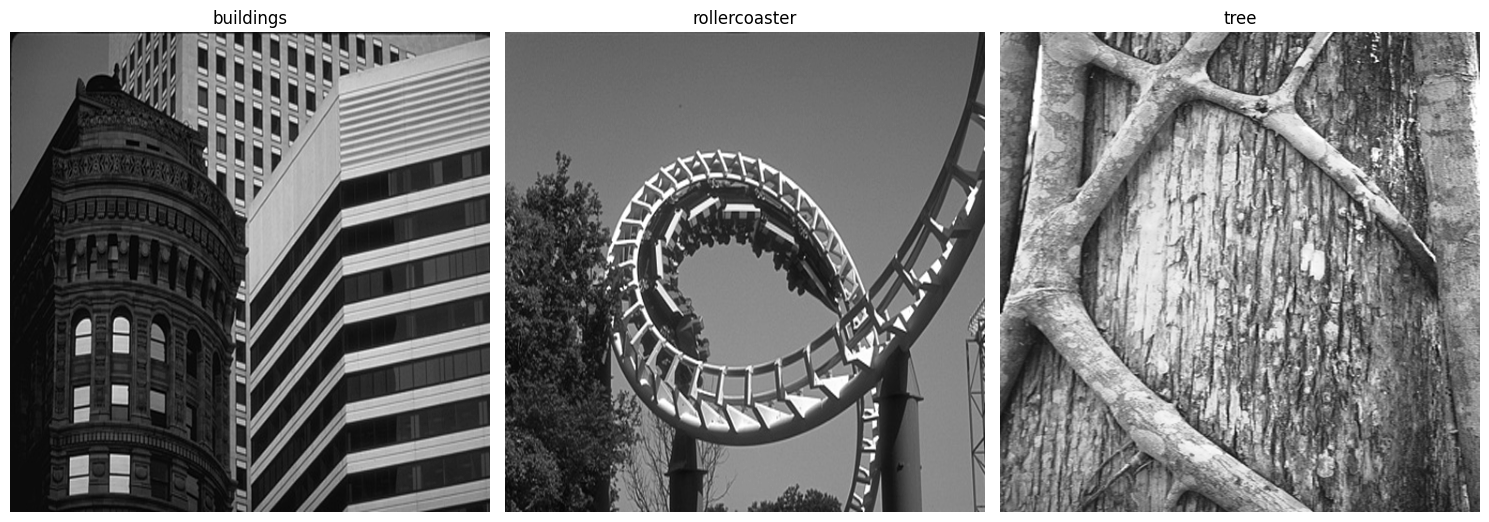

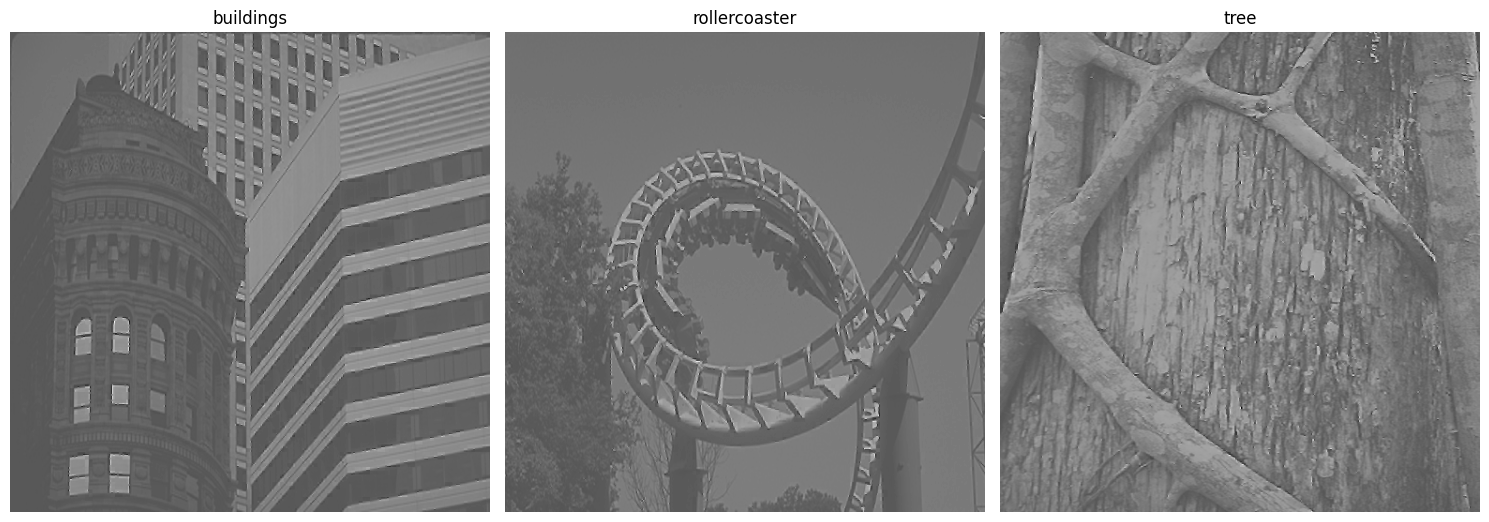

In [5]:
utility.visualize_images_with_desc(imgs, labels)
utility.visualize_images_with_desc(watermarked, labels)


In [12]:
watermarked = [cv2.imread(os.path.join('./watermarked_imgs', img), 0) for img in os.listdir('./watermarked_imgs')]
for w, i in zip(watermarked, imgs):
    attacked,_,_ = grt.blur_gauss(w, 1.2)
    det,q = detection.detection(i, w, w, alpha=8.4, max_layer=2, mask_type=2)
    print(det, q)

1 9999999
1 9999999
1 9999999


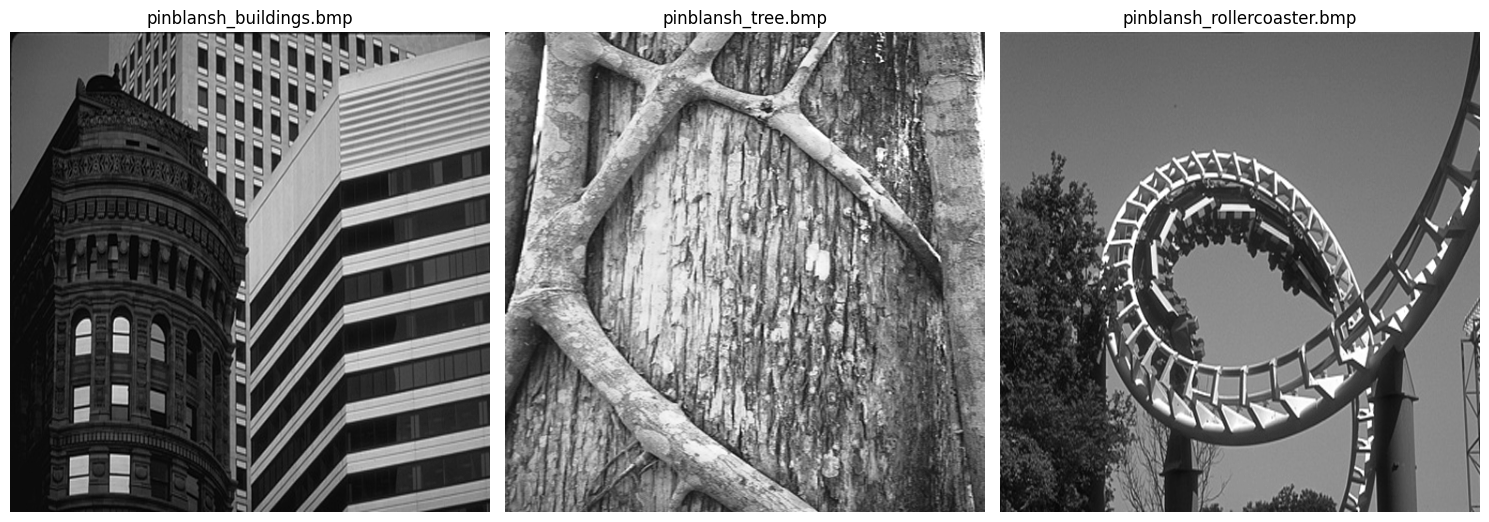

In [18]:
images_files =  [f for f in os.listdir('challenge_imgs') if f.endswith(('.bmp'))]
watermarked_files = [f for f in os.listdir("/home/sh4ring4n/University/mds/multimedia-data-security/challenge/pinblansh") if f.endswith(('.bmp'))]
images = [cv2.imread(os.path.join('./challenge_imgs', img), 0) for img in os.listdir('./challenge_imgs')]
watermarked = [cv2.imread(os.path.join("/home/sh4ring4n/University/mds/multimedia-data-security/challenge/pinblansh", img), 0) for img in os.listdir("/home/sh4ring4n/University/mds/multimedia-data-security/challenge/pinblansh") if img.endswith(('.bmp'))]

utility.visualize_images_with_desc(watermarked, watermarked_files)
